In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 

Линейная регрессия (1D)
Сгенерируйте синтетический набор точек вида y = ax+b+noise. Решите задачу линейной
регрессии для множества точек (x, y). Поиск параметров произведите с помощью
градиентного спуска. Результат — параметры линейной регрессии.
2. Логистическая регрессия (2D)
Сгенерируйте два синтетических набора точек на плоскости, добавьте им метки классов (2
класса). Визуализируйте множества (matplotlib). Разделите данные на тренировочный и
тестовый набор. Реализуйте логистическую регрессию. Проверьте точность полученного
алгоритма с помощью метрики accuracy (на тестовом множестве).
3. Дерево принятия решений (2D)
Рассмотрите те же данные, что и в задании 2. Разделите точки на классы с помощью
алгоритма CART(gini criterion). Ограничьте глубину дерева (по вашему выбору). Проверьте
точность полученного алгоритма с помощью метрики accuracy на тестовом наборе.

# Task 1: gradient descent on linear regression

In [83]:
def data_1dim(n_samples):
    k = np.random.uniform(0,3)
    b = np.random.uniform(0,3)
    X = np.linspace(1,100,n_samples)
    f_d1 = lambda x: k * x + b + (np.random.uniform(4,8) * np.log(x**2))
    y = [f_d1(i) for i in X ]
    
    return k,b,X.reshape(-1,1),np.reshape(y,(-1,1))

def hypothesis(theta,X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n + 1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta,X[i]))
    h = h.reshape(X.shape[0])
    
    return h

def BGD(theta,alpha,num_iters,h,X,y,n):
    cost = np.ones((num_iters,1))
    for i in range(num_iters):
        theta[0] = theta[0] - alpha/X.shape[0] * sum(h-y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h - y) * X.transpose()[j])
            #print(theta[j])
        h = hypothesis(theta,X,n)
        cost[i] = 1/X.shape[0] * 0.5 *sum(np.square(h - y))
        
    return theta,cost

def linear_regression(X,y,alpha,n_iters):
    n = X.shape[1]
    one_mat = np.ones((X.shape[0],1))
    X = np.concatenate((one_mat,X),axis = 1)
    theta = np.zeros(n+1)
    h = hypothesis(theta,X,n)
    theta_eval,cost = BGD(theta,alpha,n_iters,h,X,y,n)
    
    return theta_eval,cost

In [93]:
from sklearn.model_selection import train_test_split
k,b,x,y= data_1dim(300)
x = (x - x.mean()) / x.std()
#x = np.c_[np.ones(x.shape[0]), x] 
print(k,b)

0.49715762206136627 2.3127890089410843


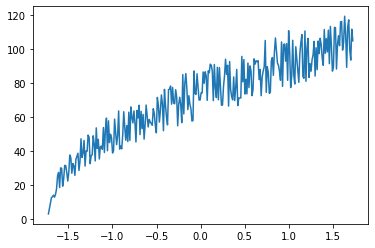

In [94]:
plt.plot(x,y)

In [109]:
theta,cost = linear_regression(x,y.reshape(300),0.0001,100)

In [114]:
print(k,b)
print(theta)

0.49715762206136627 2.3127890089410843
[0.5999786, 2.3594284]


# Task 2: logistic regression

In [18]:
def data_2dim(n_samples):
    
    X0 = np.linspace(50,150,n_samples)
    X1 = np.linspace(5,35,n_samples)
    y = np.random.randint(0,2,n_samples)
    return np.concatenate([X0.reshape(-1,1),X1.reshape(-1,1)],axis = 1),np.reshape(y,(n_samples))

def sigmoid(X, weight):
    #%debug
    z = np.dot(X, weight[0])
    return 1 / (1 + np.exp(-z))

def BGD(theta,alpha,num_iters,h,X,y,n):
    
    cost = np.ones((num_iters,1))
    for i in range(num_iters):
        theta[0] = theta[0] - alpha/X.shape[0] * sum(h-y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h - y) * X.transpose()[j])
            #print(theta[j])
        h = hypothesis_(theta,X,n)
        cost[i] = 1/X.shape[0] * 0.5 *sum(np.square(h - y))
        
    return theta,cost

def hypothesis_(theta,X,n):
    
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n + 1)
    for i in range(0,X.shape[0]):
        h[i] = sigmoid(X[i],theta)
    h = h.reshape(X.shape[0])
    
    return h 

def log_regression(X,y,alpha,n_iters):
    
    n = X.shape[1]
    one_mat = np.ones((X.shape[0],1))
    X = np.concatenate((one_mat,X),axis = 1)
    theta = np.zeros(n+1)
    
    h = hypothesis_(theta,X,n)
    theta_eval,cost = BGD(theta,alpha,n_iters,h,X,y,n)
    
    return theta,cost

def evaluate_model(x_test,y_test,theta):
    
    one_mat = np.ones((x_test.shape[0],1))
    x_test = np.concatenate((one_mat,x_test),axis = 1)
    y_predicted = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        y_predicted[i] = np.dot(x_test[i],theta)
    f_ = lambda x :0 if x < 0.5 else 1
    y_predicted = [f_(x) for x in y_predicted]
    count = 0
    for s in range(x_test.shape[0]):
        if y_predicted[s] == y_test[s]:
            count += 1
            
    return count/x_test.shape[0] * 100

In [39]:
from sklearn.model_selection import train_test_split

num_samples = 1000
batch_size = 64
X1 = np.random.normal(size=(num_samples,2), scale=10,loc = (50, 5))
X2 = np.random.normal(size=(num_samples,2), scale=10,loc = (-20, -30))
X = np.concatenate([X1, X2])
Y = np.ones(2*num_samples)
Y[:num_samples] = 0
Y[num_samples:] = 1
indexes = np.arange(2*num_samples)
np.random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
print(X.shape, Y.shape)

a_pred = np.array([-5., 3]).reshape(2, 1)
b_pred = np.array([-120.])
#x,y = data_2dim(100)
#x = (x - x.mean()) / x.std()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
#X_train,Y_train = x[:250],y[:250] ## Я знаю что так нельзя делать
#X_test,Y_test = x[250:],y[250:]

(2000, 2) (2000,)


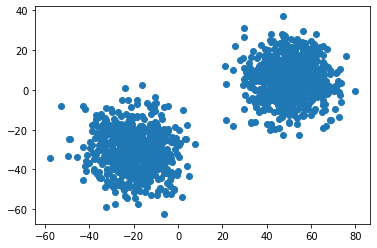

In [32]:
plt.scatter(X_train[:,0],X_train[:,1])

In [33]:
theta,cost = log_regression(X_train,Y_train,0.001,10000)
accuracy = evaluate_model(X_test,Y_test,theta)
print("Точность:{0}%".format(accuracy))

Точность:100.0%


In [35]:
theta

array([ 0.0086696, -0.2622   , -0.2130486])

# Task 3:desision tree

In [1]:
def check_purity(data):
    
    label_column = data[:,-1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False


def classify_data(data):
    
    label_column = data[:,-1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification


def get_potential_splits(data):

    potential_splits = dict()
    _, n_columns = data.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index] = list()
        values = data[:, column_index]
        unique_value = np.unique(values)
        for index in range(len(unique_value)):
            if index != 0:
                current_value = unique_value[index]
                previous_value = unique_value[index - 1]
                potential_split = (current_value + previous_value)/2
                potential_splits[column_index].append(potential_split)
    return potential_splits


def split_data(data, split_column, split_value):
    split_column_values = data[:, split_column]
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    return data_below,data_above


def calculate_entropy(data):
    
    label_column = data[:,-1]
    _, counts = np.unique(label_column, return_counts = True)
    
    probabilities = counts / counts.sum()
    entropy = 1 - sum(probabilities**2)
    
    return entropy


def calculate_overall_entropy(data_below, data_above):
    
    n_data_points = len(data_above) + len(data_below)
    
    p_data_below = len(data_below)/ n_data_points
    p_data_above = len(data_above)/ n_data_points
    
    overall_entropy = (p_data_below*calculate_entropy(data_below) + p_data_above*calculate_entropy(data_above))
    
    return overall_entropy


def determine_best_split(data, potential_splits):
    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column = column_index, split_value = value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)
            if current_overall_entropy < overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
            
    return best_split_column, best_split_value



def decision_tree_algorithm(data, counter=0, max_depth=2):
    
    if check_purity(data):
        classification = classify_data(data)
        return classification
    
    # recursive part
    else:
        counter += 1
        
        # helper function
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        # sub-tree
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        
        
        # find answers (recursion)
        if counter < max_depth:
            yes_answer = decision_tree_algorithm(data_below, counter=counter)
            no_answer = decision_tree_algorithm(data_above, counter=counter)
        else:
            yes_answer = classify_data(data_below)
            no_answer = classify_data(data_above)
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree
    
    
def predict_on_one_sample(x, tree):
    new_tree = tree.copy()
    while True:
        for condition, v in new_tree.items():
            split_column = int(condition[0])
            split_value = float(condition[5:])
            break
        if x[split_column] <= split_value:
            if isinstance(v[0], dict):
                new_tree = v[0]
            else:
                return v[0]
        else:
            if isinstance(v[1], dict):
                new_tree = v[1]
            else:
                return v[1]
            

def predict(X, tree):
    assert len(X.shape) == 2
    Y_prediction = np.empty((X.shape[0], 1))
    for i in range(X.shape[0]):
        Y_prediction[i] = predict_on_one_sample(X[i], tree)
    return Y_prediction

In [5]:
num_samples = 1000
lr = 0.1
X1 = np.random.normal(size=(num_samples,2), scale=10,loc = (10, 5))
X2 = np.random.normal(size=(num_samples,2), scale=10,loc = (-20, -30))
X = np.concatenate([X1, X2])
Y = np.ones(2*num_samples)
Y[:num_samples] = 0
Y[num_samples:] = 1
indexes = np.arange(2*num_samples)
np.random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
print(X.shape, Y.shape)

(2000, 2) (2000,)


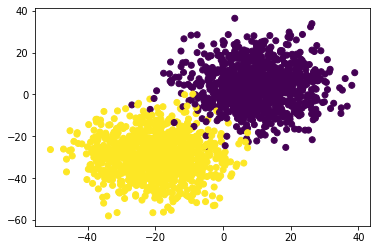

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [7]:
data = np.concatenate([X, Y.reshape(X.shape[0], 1)], axis=1)
tree = decision_tree_algorithm(data)

In [80]:
Y_predicted = predict(X, tree)
print("Точность = ", (Y_predicted[:, 0] == Y).mean())

Точность =  0.9905
